##  RNN - LSTM & GRU

In [2]:
# import
import numpy as np
import matplotlib.pyplot as plt
import os

import keras
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

**Reading the Data**

In [9]:
path = '../../datasets/climate'
filename = os.path.join(path, 'jena_climate_2009_2016.csv')

with open(filename) as fh:
    lines = fh.read().split('\n')
    header = lines[:1][0].split(",")
    lines = lines[1:]

In [11]:
print(header)
print(len(lines))
print(lines[:2])

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551
['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30', '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10']


**Converting all the data as numpy**

In [15]:
float_data = np.zeros((len(lines), len(header)-1) )  ## Did not including the date time into the numpy

for idx, line in enumerate(lines):
    value = line.split(',')[1:]
    float_data[idx,:] = value

In [16]:
float_data[:3]

array([[  9.96520000e+02,  -8.02000000e+00,   2.65400000e+02,
         -8.90000000e+00,   9.33000000e+01,   3.33000000e+00,
          3.11000000e+00,   2.20000000e-01,   1.94000000e+00,
          3.12000000e+00,   1.30775000e+03,   1.03000000e+00,
          1.75000000e+00,   1.52300000e+02],
       [  9.96570000e+02,  -8.41000000e+00,   2.65010000e+02,
         -9.28000000e+00,   9.34000000e+01,   3.23000000e+00,
          3.02000000e+00,   2.10000000e-01,   1.89000000e+00,
          3.03000000e+00,   1.30980000e+03,   7.20000000e-01,
          1.50000000e+00,   1.36100000e+02],
       [  9.96530000e+02,  -8.51000000e+00,   2.64910000e+02,
         -9.31000000e+00,   9.39000000e+01,   3.21000000e+00,
          3.01000000e+00,   2.00000000e-01,   1.88000000e+00,
          3.02000000e+00,   1.31024000e+03,   1.90000000e-01,
          6.30000000e-01,   1.71600000e+02]])

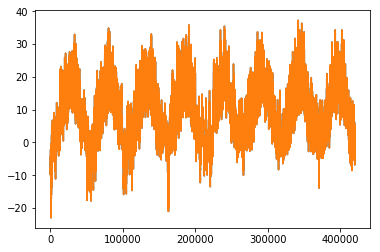

In [20]:
tmp = float_data[:, 1]

plt.plot(np.arange(len(tmp)), tmp)
plt.show()

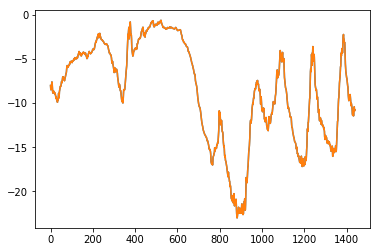

In [23]:
plt.plot(range(1440), tmp[:1440])
plt.show()